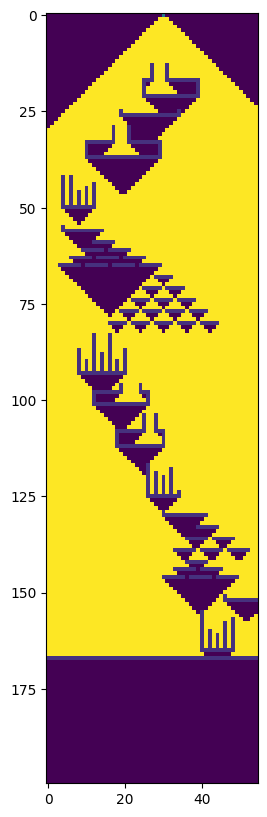

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def update_grid(d1,d2):
    x1,y1 = d1
    x2, y2= d2
    output = None
    if x1==x2:
        #iterate cols
        output = np.array([x1,np.arange(min(y1,y2),max(y1,y2)+1)],dtype=object)
    else:
        output = np.array([np.arange(min(x1,x2),max(x1,x2)+1),y1],dtype=object)
    
    
    return output


def simulate(num_runs):
    maxn = 175
    with open("data4.txt") as f:
        lines = f.read()

    ls = []
    grid = np.zeros((2000,2000))
    for x in lines.split('\n'):
        ls.append([np.array(t.split(","),dtype=int) for t in x.split("->")])
    
    for row in ls:
        for t in range(0,len(row)-1):
            z = update_grid(row[t],row[t+1])
            grid[z[0],z[1]]=1

    m_grid = grid.T
    m_grid[167,:]=1
    start = np.array([0,500])
    m_grid[tuple(start)]=3
    
    for s in range(0,num_runs):
       
        current = start.copy()
        for x in range(0,maxn):
          
            if m_grid[tuple(current + np.array([1,0]))] ==  0:
                current += np.array([1,0])
            else:
                #try left
                if m_grid[tuple(current + np.array([1,-1]))] == 0:
                    current += np.array([1,-1])
                else:
                    if m_grid[tuple(current + np.array([1,1]))] == 0:
                        current += np.array([1,1])
                    else:
                        break

        m_grid[tuple(current)]=7
    
    return m_grid
       

#for x in range(0,500):
#    if simulate(x) > 0:
#        print(x)
#        break

z = simulate(26357)
plt.figure(figsize = (10,10))
plt.imshow(z[0:200,470:525])

#m_grid[0:12,490:505]    
#for x in range(26350,26376):
##    z = simulate(x)
#    if z[0,500]==7:
#        print(x)
#        break

In [6]:
from matplotlib import pyplot as plt
plt.figure(figsize = (10,10))



import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, ax = plt.subplots()

def animate(t):
    z = simulate(t)
    plt.imshow(z[0:100,470:525])

anim = matplotlib.animation.FuncAnimation(fig, animate, frames=100)

anim.save('animation2.gif', writer='imagemagick', fps=60)


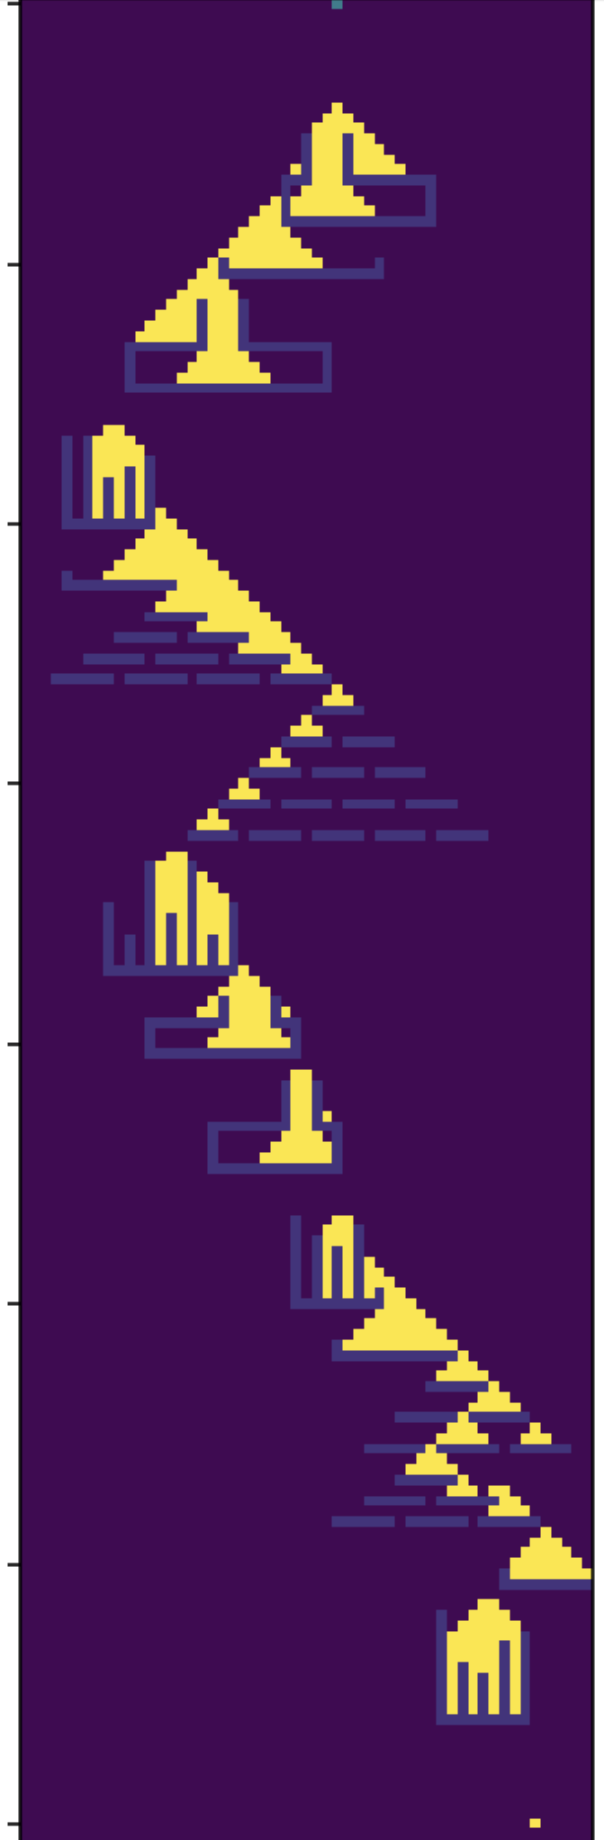

